In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Goutam\OneDrive\Desktop\Multiple Regression\Multiple Regression\50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

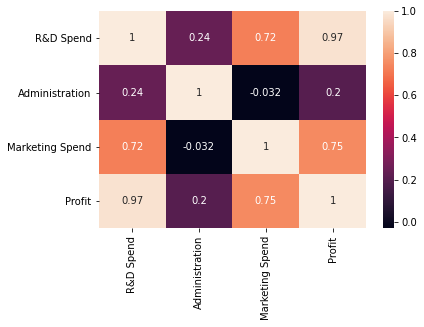

In [3]:
sns.heatmap(df.corr(),annot=True)

In [4]:
df.drop(['State','Administration'],axis=1,inplace=True)

<AxesSubplot:>

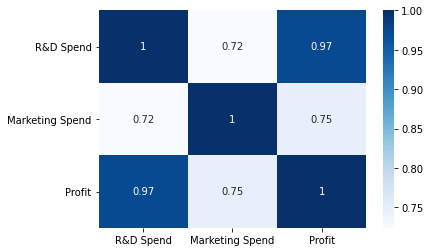

In [5]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

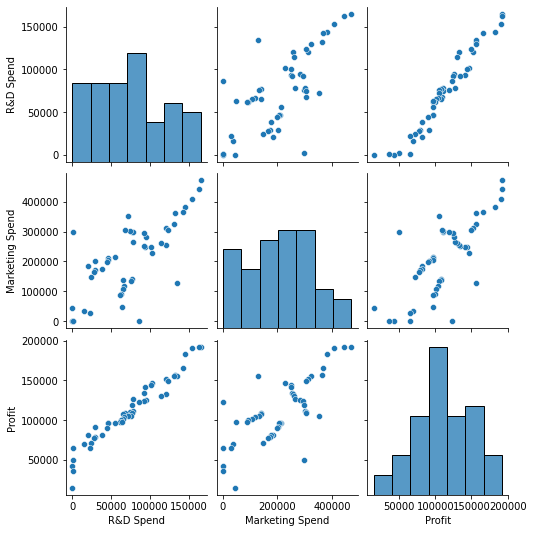

In [6]:
sns.pairplot(df)

In [7]:
x=df.drop("Profit",axis=1).values
y=df['Profit'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor_c=LinearRegression()
regressor_c.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pre=regressor_c.predict(x_test)

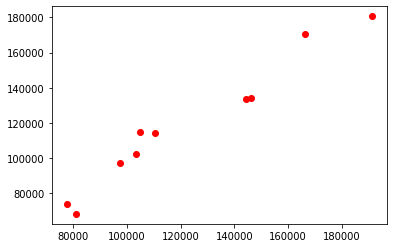

In [11]:
plt.scatter(y_test,y_pre,c="red")
plt.show()

# P Value method for Increasing Accuracy

In [12]:
import statsmodels.api as smf
regressor_ols=smf.OLS(endog=y_train,exog=x_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              395.3
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                    3.69e-26
Time:                        13:13:21   Log-Likelihood:                         -461.80
No. Observations:                  40   AIC:                                      927.6
Df Residuals:                      38   BIC:                                      931.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9835      0.123      8.027      0.000       0.735       1.232
x2             0.1349      0.044      3.059      0.004       0.046       0.224
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.404
Skew:                          -0.029   Prob(JB):                        0.817
Kurtosis:                       2.511   Cond. No.                         7.96
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# required P values is : less than 0.05